## 1. Import libraries <a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pandas_profiling as pp

# models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## 2. Download datasets <a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

In [94]:
data = pd.read_csv("/content/ac_inac_VGG16_AUG.csv")

In [95]:
data.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,category
0,0.572503,-0.145943,-0.351875,0.022737,0.347238,-0.175279,-0.267142,-0.529872,0.290529,-0.403909,...,0.011439,0.181855,-0.377247,-0.215264,0.627627,-0.182946,-0.111065,0.003010,0.149764,ac
1,0.562829,0.042653,-0.600093,-0.056949,0.128849,-0.176874,-0.563654,-0.317280,0.165151,-0.177681,...,0.162752,0.143464,-0.497423,-0.269498,0.183216,-0.337710,0.066085,-0.007382,0.342360,ac
2,0.578450,-0.177877,-0.453150,0.270051,0.083621,-0.311422,-0.313145,0.034852,0.017913,0.071805,...,-0.123023,0.009283,0.361350,0.400660,0.038297,-0.032932,0.506930,-0.002189,-0.115332,ac


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 76 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1       2120 non-null   float64
 1   PC2       2120 non-null   float64
 2   PC3       2120 non-null   float64
 3   PC4       2120 non-null   float64
 4   PC5       2120 non-null   float64
 5   PC6       2120 non-null   float64
 6   PC7       2120 non-null   float64
 7   PC8       2120 non-null   float64
 8   PC9       2120 non-null   float64
 9   PC10      2120 non-null   float64
 10  PC11      2120 non-null   float64
 11  PC12      2120 non-null   float64
 12  PC13      2120 non-null   float64
 13  PC14      2120 non-null   float64
 14  PC15      2120 non-null   float64
 15  PC16      2120 non-null   float64
 16  PC17      2120 non-null   float64
 17  PC18      2120 non-null   float64
 18  PC19      2120 non-null   float64
 19  PC20      2120 non-null   float64
 20  PC21      2120 non-null   floa

In [97]:
target_name = 'category'
data_target = data[target_name]
data = data.drop([target_name], axis=1)

I split data on 30% in the test dataset, the remaining 70% - in the training dataset

In [98]:
train, test, target, target_test = train_test_split(data, data_target, test_size=0.2, random_state=0)

In [99]:
train.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75
684,-0.337174,-0.698046,0.811147,0.113914,-0.339549,-0.174425,-0.145557,0.377993,0.098851,0.060460,...,0.015147,0.078712,-0.141687,-0.069534,0.204518,-0.390144,0.094145,-0.790130,-0.310241,-0.699907
1683,-0.397907,-0.617182,-0.109881,-0.429684,0.147054,-0.033615,-0.449364,-0.074778,-0.026445,-0.285557,...,0.056053,0.077654,-0.250100,-0.121605,0.205726,0.004072,-0.241733,-0.333448,-0.162919,0.272761
267,0.135528,-0.149714,-0.283959,0.486384,-0.473544,-0.469907,0.112625,0.131704,-0.032107,-0.084287,...,-0.000456,-0.238601,0.245767,-0.051902,0.080727,0.185569,-0.378848,-0.117466,-0.206472,-0.130845


In [100]:
test.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75
405,-0.366799,-0.314604,0.247460,0.465335,-0.581839,-0.642838,-0.210046,-0.033562,-0.674323,0.036261,...,0.310428,-0.237949,-0.407700,-0.350681,-0.092619,-0.382900,0.016602,-0.436746,-0.094511,-0.237161
1702,-0.044270,0.304360,0.220541,-0.280175,-0.562625,0.513022,-0.155743,0.328730,-0.194925,-0.501571,...,-0.059699,-0.064734,-0.301249,-0.208628,0.592159,-0.328428,-0.156714,-0.356153,-0.062165,-0.237603
813,-0.190597,-0.181912,-0.259698,-0.120032,-0.514117,-0.097240,-0.018211,0.100304,0.092559,0.155443,...,-0.148414,-0.348628,-0.234792,0.229165,-0.503491,0.207231,0.217309,0.114963,-0.281713,0.205731


In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 684 to 1653
Data columns (total 75 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     1696 non-null   float64
 1   PC2     1696 non-null   float64
 2   PC3     1696 non-null   float64
 3   PC4     1696 non-null   float64
 4   PC5     1696 non-null   float64
 5   PC6     1696 non-null   float64
 6   PC7     1696 non-null   float64
 7   PC8     1696 non-null   float64
 8   PC9     1696 non-null   float64
 9   PC10    1696 non-null   float64
 10  PC11    1696 non-null   float64
 11  PC12    1696 non-null   float64
 12  PC13    1696 non-null   float64
 13  PC14    1696 non-null   float64
 14  PC15    1696 non-null   float64
 15  PC16    1696 non-null   float64
 16  PC17    1696 non-null   float64
 17  PC18    1696 non-null   float64
 18  PC19    1696 non-null   float64
 19  PC20    1696 non-null   float64
 20  PC21    1696 non-null   float64
 21  PC22    1696 non-null   float64
 22

In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 405 to 1240
Data columns (total 75 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     424 non-null    float64
 1   PC2     424 non-null    float64
 2   PC3     424 non-null    float64
 3   PC4     424 non-null    float64
 4   PC5     424 non-null    float64
 5   PC6     424 non-null    float64
 6   PC7     424 non-null    float64
 7   PC8     424 non-null    float64
 8   PC9     424 non-null    float64
 9   PC10    424 non-null    float64
 10  PC11    424 non-null    float64
 11  PC12    424 non-null    float64
 12  PC13    424 non-null    float64
 13  PC14    424 non-null    float64
 14  PC15    424 non-null    float64
 15  PC16    424 non-null    float64
 16  PC17    424 non-null    float64
 17  PC18    424 non-null    float64
 18  PC19    424 non-null    float64
 19  PC20    424 non-null    float64
 20  PC21    424 non-null    float64
 21  PC22    424 non-null    float64
 22 

In [103]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=0.2, random_state=0)

## 5. Tuning models and test for all features <a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)

### 5.1 Logistic Regression <a class="anchor" id="5.1"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

**Logistic Regression** is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).

Note the confidence score generated by the model based on our training dataset.

In [104]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, target)
acc_log = round(logreg.score(train, target) * 100, 2)
acc_log

88.97

In [105]:
acc_test_log = round(logreg.score(test, target_test) * 100, 2)
acc_test_log

88.68

Confusion matrix

 [[179  28]
 [ 20 197]]

True Positives(TP) =  179

True Negatives(TN) =  197

False Positives(FP) =  28

False Negatives(FN) =  20
              precision    recall  f1-score   support

          ac       0.90      0.86      0.88       207
        inac       0.88      0.91      0.89       217

    accuracy                           0.89       424
   macro avg       0.89      0.89      0.89       424
weighted avg       0.89      0.89      0.89       424

--------------------------------------------------------------------------------------


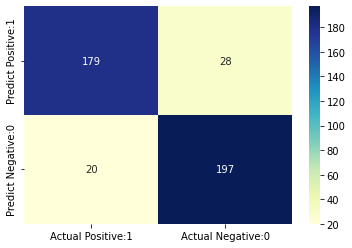

In [106]:
# Print the Confusion Matrix and slice it into four pieces
y_pred = logreg.predict(test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

from sklearn.metrics import classification_report

print(classification_report(target_test, y_pred))

# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print("--------------------------------------------------------------------------------------")

from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')




We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

- *gluc* is highest coefficient
- *height*, *smoke* are largest numbers by absolute value.

### 5.2 Support Vector Machines <a class="anchor" id="5.2"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

**Support Vector Machines** are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

In [107]:
# Support Vector Machines

svc = SVC()
svc.fit(train, target)
acc_svc = round(svc.score(train, target) * 100, 2)
acc_svc

99.65

In [108]:
acc_test_svc = round(svc.score(test, target_test) * 100, 2)
acc_test_svc

98.11

Confusion matrix

 [[201   6]
 [  2 215]]

True Positives(TP) =  201

True Negatives(TN) =  215

False Positives(FP) =  6

False Negatives(FN) =  2
              precision    recall  f1-score   support

          ac       0.99      0.97      0.98       207
        inac       0.97      0.99      0.98       217

    accuracy                           0.98       424
   macro avg       0.98      0.98      0.98       424
weighted avg       0.98      0.98      0.98       424

--------------------------------------------------------------------------------------


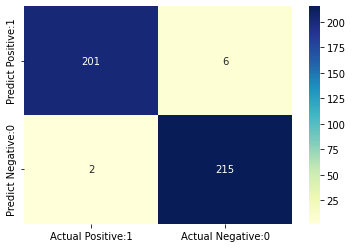

In [109]:
# Print the Confusion Matrix and slice it into four pieces
y_pred = svc.predict(test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

from sklearn.metrics import classification_report

print(classification_report(target_test, y_pred))

# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print("--------------------------------------------------------------------------------------")

from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')




### 5.4 k-Nearest Neighbors algorithm <a class="anchor" id="5.4"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

In pattern recognition, the **k-Nearest Neighbors algorithm** (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). Reference [Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

In [110]:
# k-Nearest Neighbors algorithm

knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid={'n_neighbors': [2, 3]}, cv=10).fit(train, target)
acc_knn = round(knn.score(train, target) * 100, 2)
print(acc_knn, knn.best_params_)

99.12 {'n_neighbors': 3}


In [111]:
acc_test_knn = round(knn.score(test, target_test) * 100, 2)
acc_test_knn

97.64

Confusion matrix

 [[198   9]
 [  1 216]]

True Positives(TP) =  198

True Negatives(TN) =  216

False Positives(FP) =  9

False Negatives(FN) =  1
              precision    recall  f1-score   support

          ac       0.99      0.96      0.98       207
        inac       0.96      1.00      0.98       217

    accuracy                           0.98       424
   macro avg       0.98      0.98      0.98       424
weighted avg       0.98      0.98      0.98       424

--------------------------------------------------------------------------------------


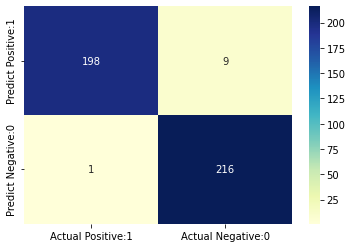

In [112]:
# Print the Confusion Matrix and slice it into four pieces
y_pred = knn.predict(test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

from sklearn.metrics import classification_report

print(classification_report(target_test, y_pred))

# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print("--------------------------------------------------------------------------------------")

from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')




### 5.5 Naive Bayes <a class="anchor" id="5.5"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

In machine learning, **Naive Bayes classifiers** are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).

In [113]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, target)
acc_gaussian = round(gaussian.score(train, target) * 100, 2)
acc_gaussian

82.9

In [114]:
acc_test_gaussian = round(gaussian.score(test, target_test) * 100, 2)
acc_test_gaussian

83.02

Confusion matrix

 [[163  44]
 [ 28 189]]

True Positives(TP) =  163

True Negatives(TN) =  189

False Positives(FP) =  44

False Negatives(FN) =  28
              precision    recall  f1-score   support

          ac       0.85      0.79      0.82       207
        inac       0.81      0.87      0.84       217

    accuracy                           0.83       424
   macro avg       0.83      0.83      0.83       424
weighted avg       0.83      0.83      0.83       424

--------------------------------------------------------------------------------------


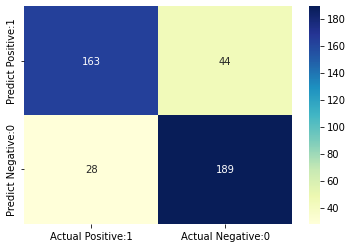

In [115]:
# Print the Confusion Matrix and slice it into four pieces
y_pred = gaussian.predict(test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

from sklearn.metrics import classification_report

print(classification_report(target_test, y_pred))

# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print("--------------------------------------------------------------------------------------")

from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')




### 5.6 Perceptron <a class="anchor" id="5.6"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

The **Perceptron** is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference [Wikipedia](https://en.wikipedia.org/wiki/Perceptron).

In [116]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, target)
acc_perceptron = round(perceptron.score(train, target) * 100, 2)
acc_perceptron

85.85

In [117]:
acc_test_perceptron = round(perceptron.score(test, target_test) * 100, 2)
acc_test_perceptron

86.32

Confusion matrix

 [[165  42]
 [ 16 201]]

True Positives(TP) =  165

True Negatives(TN) =  201

False Positives(FP) =  42

False Negatives(FN) =  16
              precision    recall  f1-score   support

          ac       0.91      0.80      0.85       207
        inac       0.83      0.93      0.87       217

    accuracy                           0.86       424
   macro avg       0.87      0.86      0.86       424
weighted avg       0.87      0.86      0.86       424

--------------------------------------------------------------------------------------


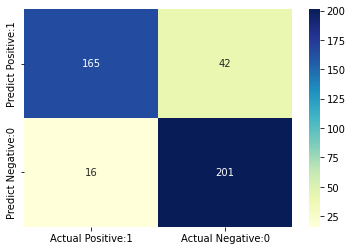

In [118]:
# Print the Confusion Matrix and slice it into four pieces
y_pred = perceptron.predict(test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

from sklearn.metrics import classification_report

print(classification_report(target_test, y_pred))

# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print("--------------------------------------------------------------------------------------")

from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')




### 5.7 Stochastic Gradient Descent <a class="anchor" id="5.7"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

**Stochastic gradient descent** (often abbreviated **SGD**) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in big data applications this reduces the computational burden, achieving faster iterations in trade for a slightly lower convergence rate. Reference [Wikipedia](https://en.wikipedia.org/wiki/Stochastic_gradient_descent).

In [119]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train, target)
acc_sgd = round(sgd.score(train, target) * 100, 2)
acc_sgd

88.74

In [120]:
acc_test_sgd = round(sgd.score(test, target_test) * 100, 2)
acc_test_sgd

89.15

Confusion matrix

 [[188  19]
 [ 27 190]]

True Positives(TP) =  188

True Negatives(TN) =  190

False Positives(FP) =  19

False Negatives(FN) =  27
              precision    recall  f1-score   support

          ac       0.87      0.91      0.89       207
        inac       0.91      0.88      0.89       217

    accuracy                           0.89       424
   macro avg       0.89      0.89      0.89       424
weighted avg       0.89      0.89      0.89       424

--------------------------------------------------------------------------------------


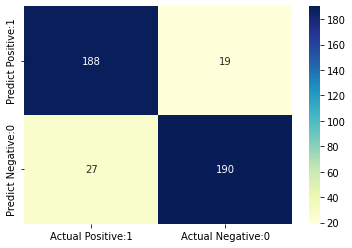

In [121]:
# Print the Confusion Matrix and slice it into four pieces
y_pred = sgd.predict(test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

from sklearn.metrics import classification_report

print(classification_report(target_test, y_pred))

# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print("--------------------------------------------------------------------------------------")

from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')




### 5.8 Decision Tree Classifier <a class="anchor" id="5.8"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

This model uses a **Decision Tree** as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning).

In [122]:
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, target)
acc_decision_tree = round(decision_tree.score(train, target) * 100, 2)
acc_decision_tree

100.0

In [123]:
acc_test_decision_tree = round(decision_tree.score(test, target_test) * 100, 2)
acc_test_decision_tree

78.54

Confusion matrix

 [[155  52]
 [ 39 178]]

True Positives(TP) =  155

True Negatives(TN) =  178

False Positives(FP) =  52

False Negatives(FN) =  39
              precision    recall  f1-score   support

          ac       0.80      0.75      0.77       207
        inac       0.77      0.82      0.80       217

    accuracy                           0.79       424
   macro avg       0.79      0.78      0.78       424
weighted avg       0.79      0.79      0.79       424

--------------------------------------------------------------------------------------


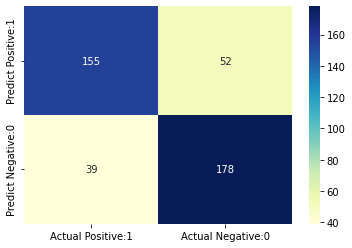

In [124]:
# Print the Confusion Matrix and slice it into four pieces
y_pred = decision_tree.predict(test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

from sklearn.metrics import classification_report

print(classification_report(target_test, y_pred))

# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print("--------------------------------------------------------------------------------------")

from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')




### 5.9 Random Forests <a class="anchor" id="5.9"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/startupsci/titanic-data-science-solutions

**Random Forests** is one of the most popular model. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators= [100, 300]) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference [Wikipedia](https://en.wikipedia.org/wiki/Random_forest).

In [125]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [20, 300]}, cv=5).fit(train, target)
random_forest.fit(train, target)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

100.0 {'n_estimators': 300}


In [126]:
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest

95.28

Confusion matrix

 [[195  12]
 [  8 209]]

True Positives(TP) =  195

True Negatives(TN) =  209

False Positives(FP) =  12

False Negatives(FN) =  8
              precision    recall  f1-score   support

          ac       0.96      0.94      0.95       207
        inac       0.95      0.96      0.95       217

    accuracy                           0.95       424
   macro avg       0.95      0.95      0.95       424
weighted avg       0.95      0.95      0.95       424

--------------------------------------------------------------------------------------


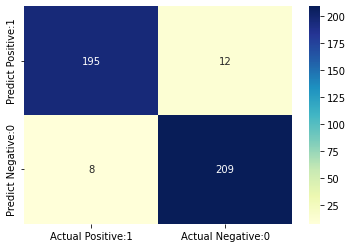

In [127]:
# Print the Confusion Matrix and slice it into four pieces
y_pred = random_forest.predict(test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

from sklearn.metrics import classification_report

print(classification_report(target_test, y_pred))

# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print("--------------------------------------------------------------------------------------")

from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')




### 5.11 LGBM Classifier <a class="anchor" id="5.11"></a>

[Back to Table of Contents](#0.1)

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithms. It splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’. Reference [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/).

We will tuning the hyperparameters of the LGBMClassifier model using the HyperOpt and 10-fold crossvalidation

In [128]:
def hyperopt_lgb_score(params):
    clf = LGBMClassifier(**params)
    current_score = cross_val_score(clf, train, target, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_lgb = {
            'learning_rate': hp.quniform('learning_rate', 0, 0.05, 0.0001),
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'max_depth':  hp.choice('max_depth', np.arange(2, 12, dtype=int)),
            'num_leaves': hp.choice('num_leaves', 2*np.arange(2, 2**11, dtype=int)),
            'min_child_weight': hp.quniform('min_child_weight', 1, 9, 0.025),
            'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.005),
            'objective': 'binary',
            'boosting_type': 'gbdt',
            }
 
best = fmin(fn=hyperopt_lgb_score, space=space_lgb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

0.9363035154890358
{'boosting_type': 'gbdt', 'colsample_bytree': 0.77, 'learning_rate': 0.037200000000000004, 'max_depth': 11, 'min_child_weight': 6.9, 'n_estimators': 525, 'num_leaves': 1496, 'objective': 'binary'}
0.9475182735816219
{'boosting_type': 'gbdt', 'colsample_bytree': 0.52, 'learning_rate': 0.044500000000000005, 'max_depth': 10, 'min_child_weight': 1.625, 'n_estimators': 349, 'num_leaves': 2944, 'objective': 'binary'}
0.9268917507831536
{'boosting_type': 'gbdt', 'colsample_bytree': 0.505, 'learning_rate': 0.008400000000000001, 'max_depth': 6, 'min_child_weight': 5.45, 'n_estimators': 476, 'num_leaves': 3432, 'objective': 'binary'}
0.8690985033066483
{'boosting_type': 'gbdt', 'colsample_bytree': 0.665, 'learning_rate': 0.0028, 'max_depth': 8, 'min_child_weight': 6.2, 'n_estimators': 137, 'num_leaves': 1742, 'objective': 'binary'}
0.9333727810650888
{'boosting_type': 'gbdt', 'colsample_bytree': 0.79, 'learning_rate': 0.0354, 'max_depth': 4, 'min_child_weight': 8.1, 'n_estimat

In [129]:
params = space_eval(space_lgb, best)
params

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.68,
 'learning_rate': 0.023200000000000002,
 'max_depth': 2,
 'min_child_weight': 5.175000000000001,
 'n_estimators': 344,
 'num_leaves': 778,
 'objective': 'binary'}

In [155]:
LGB_Classifier = LGBMClassifier(**{'boosting_type': 'gbdt', 'colsample_bytree': 0.52, 'learning_rate': 0.044500000000000005, 'max_depth': 10, 'min_child_weight': 1.625, 'n_estimators': 349, 'num_leaves': 2944, 'objective': 'binary'}
)
LGB_Classifier.fit(train, target)
acc_LGB_Classifier = round(LGB_Classifier.score(train, target) * 100, 2)
acc_LGB_Classifier

100.0

In [156]:
acc_test_LGB_Classifier = round(LGB_Classifier.score(test, target_test) * 100, 2)
acc_test_LGB_Classifier

96.7

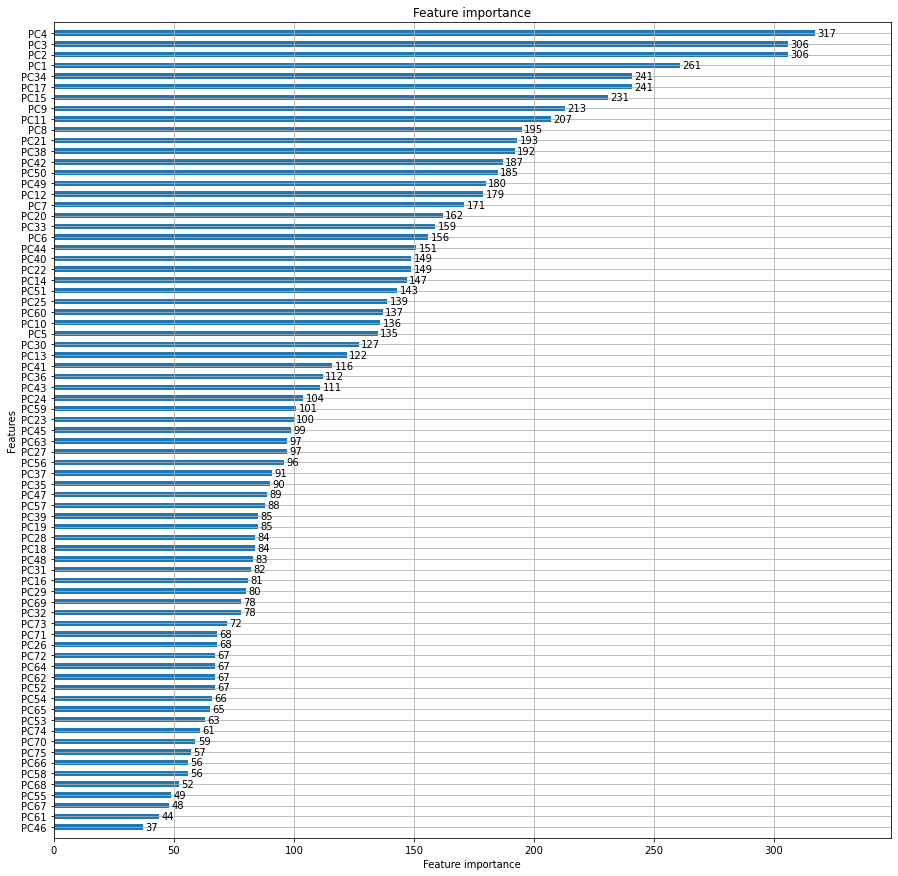

In [157]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
lgb.plot_importance(LGB_Classifier,ax = axes,height = 0.5)
plt.show();
plt.close()

Confusion matrix

 [[201   6]
 [  8 209]]

True Positives(TP) =  201

True Negatives(TN) =  209

False Positives(FP) =  6

False Negatives(FN) =  8
              precision    recall  f1-score   support

          ac       0.96      0.97      0.97       207
        inac       0.97      0.96      0.97       217

    accuracy                           0.97       424
   macro avg       0.97      0.97      0.97       424
weighted avg       0.97      0.97      0.97       424

--------------------------------------------------------------------------------------


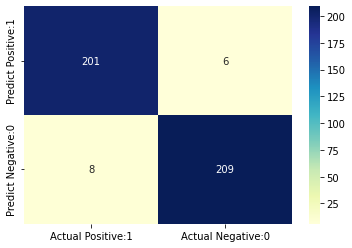

In [158]:
# Print the Confusion Matrix and slice it into four pieces
y_pred = LGB_Classifier.predict(test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

from sklearn.metrics import classification_report

print(classification_report(target_test, y_pred))

# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print("--------------------------------------------------------------------------------------")

from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')




### 5.12 GradientBoostingClassifier <a class="anchor" id="5.12"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/kabure/titanic-eda-model-pipeline-keras-nn

**Gradient Boosting** builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced. The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data and max_features=n_features, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, random_state has to be fixed. Reference [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

In [134]:
def hyperopt_gb_score(params):
    clf = GradientBoostingClassifier(**params)
    current_score = cross_val_score(clf, train, target, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_gb = {
            'n_estimators': hp.choice('n_estimators', range(2, 300)),
            'max_depth': hp.choice('max_depth', np.arange(2, 10, dtype=int))            
        }
 
best = fmin(fn=hyperopt_gb_score, space=space_gb, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

0.8997493908806126
{'max_depth': 2, 'n_estimators': 271}
0.918029933867038
{'max_depth': 3, 'n_estimators': 116}
0.9363278802645318
{'max_depth': 5, 'n_estimators': 182}
0.9262861120779673
{'max_depth': 4, 'n_estimators': 102}
0.9369091541942222
{'max_depth': 8, 'n_estimators': 167}
0.9351409676296554
{'max_depth': 7, 'n_estimators': 135}
0.9251270449008006
{'max_depth': 7, 'n_estimators': 87}
0.9386912634876436
{'max_depth': 7, 'n_estimators': 219}
0.9298364079359555
{'max_depth': 8, 'n_estimators': 97}
0.8879846849982597
{'max_depth': 9, 'n_estimators': 37}
100%|██████████| 10/10 [13:33<00:00, 81.37s/it, best loss: 0.8879846849982597]
best:
{'max_depth': 7, 'n_estimators': 35}


In [135]:
params = space_eval(space_gb, best)
params

{'max_depth': 9, 'n_estimators': 37}

In [159]:
# Gradient Boosting Classifier

gradient_boosting = GradientBoostingClassifier(**{'max_depth': 7, 'n_estimators': 219})
gradient_boosting.fit(train, target)
acc_gradient_boosting = round(gradient_boosting.score(train, target) * 100, 2)
acc_gradient_boosting

100.0

In [160]:
acc_test_gradient_boosting = round(gradient_boosting.score(test, target_test) * 100, 2)
acc_test_gradient_boosting

95.99

Confusion matrix

 [[199   8]
 [  9 208]]

True Positives(TP) =  199

True Negatives(TN) =  208

False Positives(FP) =  8

False Negatives(FN) =  9
              precision    recall  f1-score   support

          ac       0.96      0.96      0.96       207
        inac       0.96      0.96      0.96       217

    accuracy                           0.96       424
   macro avg       0.96      0.96      0.96       424
weighted avg       0.96      0.96      0.96       424

--------------------------------------------------------------------------------------


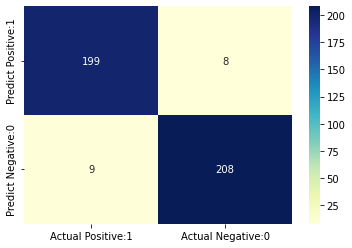

In [161]:
# Print the Confusion Matrix and slice it into four pieces
y_pred = gradient_boosting.predict(test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

from sklearn.metrics import classification_report

print(classification_report(target_test, y_pred))

# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print("--------------------------------------------------------------------------------------")

from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')




### 5.13 RidgeClassifier <a class="anchor" id="5.13"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/kabure/titanic-eda-model-pipeline-keras-nn

Tikhonov Regularization, colloquially known as **Ridge Regression**, is the most commonly used regression algorithm to approximate an answer for an equation with no unique solution. This type of problem is very common in machine learning tasks, where the "best" solution must be chosen using limited data. If a unique solution exists, algorithm will return the optimal value. However, if multiple solutions exist, it may choose any of them. Reference [Brilliant.org](https://brilliant.org/wiki/ridge-regression/).

In [139]:
# Ridge Classifier

ridge_classifier = RidgeClassifier()
ridge_classifier.fit(train, target)
acc_ridge_classifier = round(ridge_classifier.score(train, target) * 100, 2)
acc_ridge_classifier

88.5

In [140]:
acc_test_ridge_classifier = round(ridge_classifier.score(test, target_test) * 100, 2)
acc_test_ridge_classifier

88.21

Confusion matrix

 [[178  29]
 [ 21 196]]

True Positives(TP) =  178

True Negatives(TN) =  196

False Positives(FP) =  29

False Negatives(FN) =  21
              precision    recall  f1-score   support

          ac       0.89      0.86      0.88       207
        inac       0.87      0.90      0.89       217

    accuracy                           0.88       424
   macro avg       0.88      0.88      0.88       424
weighted avg       0.88      0.88      0.88       424

--------------------------------------------------------------------------------------


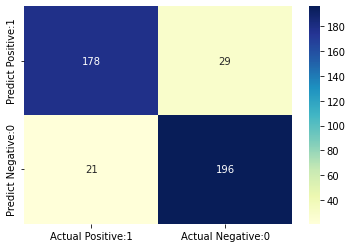

In [141]:
# Print the Confusion Matrix and slice it into four pieces
y_pred = ridge_classifier.predict(test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

from sklearn.metrics import classification_report

print(classification_report(target_test, y_pred))

# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print("--------------------------------------------------------------------------------------")

from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')




### 5.15 ExtraTreesClassifier <a class="anchor" id="5.15"></a>

[Back to Table of Contents](#0.1)

Thanks to https://www.kaggle.com/kabure/titanic-eda-model-pipeline-keras-nn

**ExtraTreesClassifier** implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values. Reference [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html). 

In extremely randomized trees, randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias. Reference [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#Extremely%20Randomized%20Trees).

In [142]:
def hyperopt_etc_score(params):
    clf = ExtraTreesClassifier(**params)
    current_score = cross_val_score(clf, train, target, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_etc = {
            'n_estimators': hp.choice('n_estimators', range(100, 1000)),
            'max_features': hp.choice('max_features', np.arange(2, 17, dtype=int)),
            'min_samples_leaf': hp.choice('min_samples_leaf', np.arange(1, 5, dtype=int)),
            'max_depth':  hp.choice('max_depth', np.arange(2, 12, dtype=int)),
            'max_features': None # for small number of features
        }
 
best = fmin(fn=hyperopt_etc_score, space=space_etc, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

0.7010720501218238
{'max_depth': 2, 'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 267}
0.9239227288548555
{'max_depth': 8, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 322}
0.9150609119387401
{'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 368}
0.9380717020536025
{'max_depth': 9, 'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 389}
0.8891159067177167
{'max_depth': 6, 'max_features': None, 'min_samples_leaf': 3, 'n_estimators': 431}
0.9457466063348416
{'max_depth': 11, 'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 415}
0.9085868430212323
{'max_depth': 7, 'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 610}
0.9309989557953358
{'max_depth': 8, 'max_features': None, 'min_samples_leaf': 2, 'n_estimators': 413}
0.7676435781413157
{'max_depth': 3, 'max_features': None, 'min_samples_leaf': 3, 'n_estimators': 258}
0.7647163243995823
{'max_depth': 3, 'max_features': None, 'min_samples_leaf': 4, 

In [143]:
params = space_eval(space_etc, best)
params

{'max_depth': 2,
 'max_features': None,
 'min_samples_leaf': 4,
 'n_estimators': 267}

In [162]:
# Extra Trees Classifier

extra_trees_classifier = ExtraTreesClassifier(**{'max_depth': 11, 'max_features': None, 'min_samples_leaf': 4, 'n_estimators': 415})
extra_trees_classifier.fit(train, target)
acc_etc = round(extra_trees_classifier.score(train, target) * 100, 2)
acc_etc

100.0

In [163]:
acc_test_etc = round(extra_trees_classifier.score(test, target_test) * 100, 2)
acc_test_etc

95.05

Confusion matrix

 [[197  10]
 [ 11 206]]

True Positives(TP) =  197

True Negatives(TN) =  206

False Positives(FP) =  10

False Negatives(FN) =  11
              precision    recall  f1-score   support

          ac       0.95      0.95      0.95       207
        inac       0.95      0.95      0.95       217

    accuracy                           0.95       424
   macro avg       0.95      0.95      0.95       424
weighted avg       0.95      0.95      0.95       424

--------------------------------------------------------------------------------------


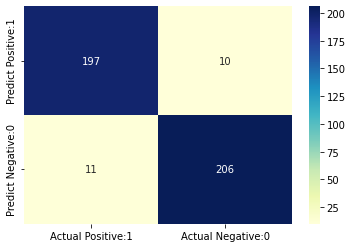

In [164]:
# Print the Confusion Matrix and slice it into four pieces
y_pred = extra_trees_classifier.predict(test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

from sklearn.metrics import classification_report

print(classification_report(target_test, y_pred))

# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print("--------------------------------------------------------------------------------------")

from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')




### 5.18 AdaBoost Classifier <a class="anchor" id="5.18"></a>

[Back to Table of Contents](#0.1)

Thanks to https://scikit-learn.org/stable/modules/ensemble.html#adaboost

The core principle of **AdaBoost** is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying N weights to each of the training samples. Initially, those weights are all set to 1/N, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence. Reference [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#adaboost).

In [147]:
def hyperopt_ab_score(params):
    clf = AdaBoostClassifier(**params)
    current_score = cross_val_score(clf, train, target, cv=10).mean()
    print(current_score, params)
    return current_score 

space_ab = {
            'n_estimators': hp.choice('n_estimators', range(50, 1000)),
            'learning_rate': hp.quniform('learning_rate', 0, 0.05, 0.0001)       
        }

best = fmin(fn=hyperopt_ab_score, space=space_ab, algo=tpe.suggest, max_evals=10)
print('best:')
print(best)

0.7906717716672468
{'learning_rate': 0.012, 'n_estimators': 851}
0.6627358162199791
{'learning_rate': 0.0002, 'n_estimators': 395}
0.8195649147232856
{'learning_rate': 0.0206, 'n_estimators': 952}
0.8054124608423251
{'learning_rate': 0.039900000000000005, 'n_estimators': 349}
0.7753324051514097
{'learning_rate': 0.0357, 'n_estimators': 216}
0.8166098155238426
{'learning_rate': 0.026500000000000003, 'n_estimators': 652}
0.7376018099547511
{'learning_rate': 0.0263, 'n_estimators': 147}
0.7735676992690567
{'learning_rate': 0.010100000000000001, 'n_estimators': 775}
0.8177897667942917
{'learning_rate': 0.0341, 'n_estimators': 505}
0.7830003480682214
{'learning_rate': 0.041800000000000004, 'n_estimators': 218}
100%|██████████| 10/10 [14:07<00:00, 84.72s/it, best loss: 0.6627358162199791]
best:
{'learning_rate': 0.0002, 'n_estimators': 345}


In [148]:
params = space_eval(space_ab, best)
params

{'learning_rate': 0.0002, 'n_estimators': 395}

In [165]:
# AdaBoost Classifier

Ada_Boost = AdaBoostClassifier(**{'learning_rate': 0.0206, 'n_estimators': 952})
Ada_Boost.fit(train, target)
Ada_Boost.score(train, target)
acc_AdaBoost = round(Ada_Boost.score(train, target) * 100, 2)
acc_AdaBoost

87.74

In [166]:
acc_test_AdaBoost = round(Ada_Boost.score(test, target_test) * 100, 2)
acc_test_AdaBoost

80.9

Confusion matrix

 [[169  38]
 [ 43 174]]

True Positives(TP) =  169

True Negatives(TN) =  174

False Positives(FP) =  38

False Negatives(FN) =  43
              precision    recall  f1-score   support

          ac       0.80      0.82      0.81       207
        inac       0.82      0.80      0.81       217

    accuracy                           0.81       424
   macro avg       0.81      0.81      0.81       424
weighted avg       0.81      0.81      0.81       424

--------------------------------------------------------------------------------------


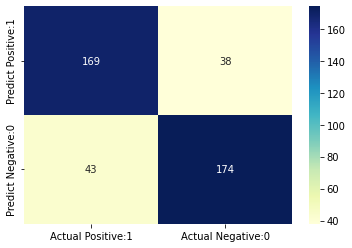

In [167]:
# Print the Confusion Matrix and slice it into four pieces
y_pred = Ada_Boost.predict(test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

from sklearn.metrics import classification_report

print(classification_report(target_test, y_pred))

# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
print("--------------------------------------------------------------------------------------")

from sklearn.metrics import roc_curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')




## 6. Models evaluation <a class="anchor" id="6"></a>

[Back to Table of Contents](#0.1)

We can now rank our evaluation of all the models to choose the best one for our problem.

In [168]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'k-Nearest Neighbors', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent', 
              'Decision Tree Classifier', 'Random Forest',  'LGBMClassifier',
              'GradientBoostingClassifier', 'RidgeClassifier', 'ExtraTreesClassifier', 
              'AdaBoostClassifier'],
    
    'Score_train': [acc_log, acc_svc, acc_knn, acc_gaussian, 
              acc_perceptron, acc_sgd, 
              acc_decision_tree, acc_random_forest, acc_LGB_Classifier,
              acc_gradient_boosting, acc_ridge_classifier, acc_etc, 
              acc_AdaBoost],
    'Score_test': [acc_test_log, acc_test_svc,  acc_test_knn, acc_test_gaussian, 
              acc_test_perceptron, acc_test_sgd, 
              acc_test_decision_tree, acc_test_random_forest, acc_test_LGB_Classifier,
              acc_test_gradient_boosting, acc_test_ridge_classifier, acc_test_etc, 
              acc_test_AdaBoost]
                    })

In [169]:
models.sort_values(by=['Score_test', 'Score_train'], ascending=False)

,Model,Score_train,Score_test
1,Support Vector Machines,99.65,98.11
2,k-Nearest Neighbors,99.12,97.64
8,LGBMClassifier,100.00,96.70
9,GradientBoostingClassifier,100.00,95.99
7,Random Forest,100.00,95.28
11,ExtraTreesClassifier,100.00,95.05
5,Stochastic Gradient Decent,88.74,89.15
0,Logistic Regression,88.97,88.68
10,RidgeClassifier,88.50,88.21
4,Perceptron,85.85,86.32


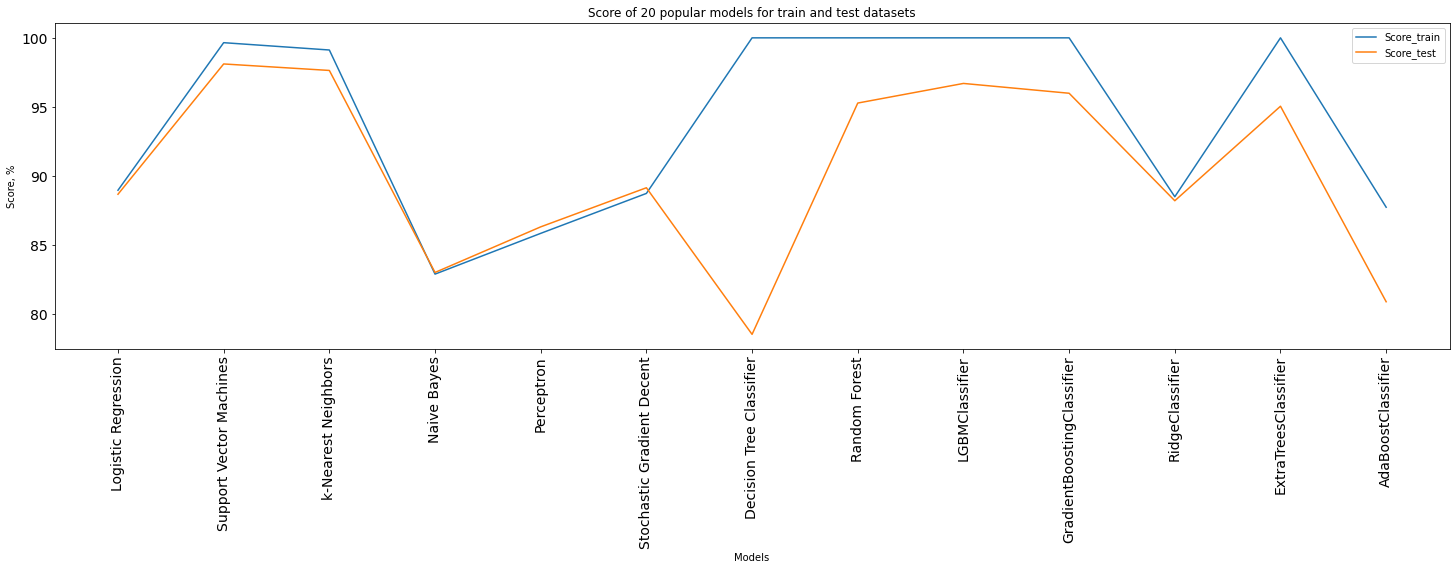

In [170]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.legend()
plt.title('Score of 20 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()